In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import string
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load datasets
supervised_data = pd.read_csv('/content/drive/MyDrive/output.csv')
unsupervised_train = pd.read_json('/content/drive/MyDrive/webis-clickbait-22/train.jsonl', lines=True)
unsupervised_val = pd.read_json('/content/drive/MyDrive/webis-clickbait-22/validation.jsonl', lines=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [ ]:
# Separate features and labels
X = supervised_data[' title']
y = supervised_data['label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the maximum number of words and sequence length
max_words = 5000
max_sequence_length = 100

In [ ]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)

In [ ]:
# Build the complex RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))  # Explicit input_length
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(GRU(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(SimpleRNN(64, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Explicitly build the model by providing the input shape
model.build(input_shape=(None, max_sequence_length))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now show the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 100, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 100, 128)            │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 100, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 888,513 (3.39 MB)

 Trainable params: 887,873 (3.39 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


In [ ]:
# Train the RNN model with validation data
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])


Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 287s 374ms/step - accuracy: 0.8785 - loss: 0.6094 - val_accuracy: 0.9648 - val_loss: 0.2663 - learning_rate: 0.0010
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 321s 374ms/step - accuracy: 0.9817 - loss: 0.1929 - val_accuracy: 0.9301 - val_loss: 0.2538 - learning_rate: 0.0010
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 330s 385ms/step - accuracy: 0.9892 - loss: 0.1011 - val_accuracy: 0.9695 - val_loss: 0.1330 - learning_rate: 0.0010
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 319s 381ms/step - accuracy: 0.9687 - loss: 0.1428 - val_accuracy: 0.5428 - val_loss: 1.8463 - learning_rate: 0.0010
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 317s 374ms/step - accuracy: 0.9813 - loss: 0.1036 - val_accuracy: 0.9144 - val_loss: 0.3664 - learning_rate: 0.0010
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 323s 376ms/step - accuracy: 0.9914 - loss: 0.0564 - val_accuracy: 0.9687 - val_loss: 0.1417 - learning_rate: 2.0000e-04


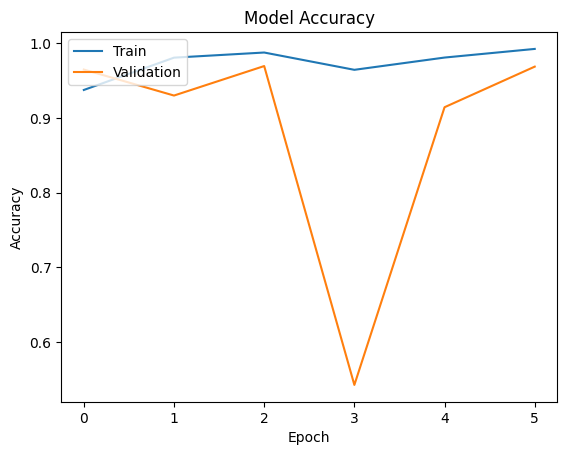

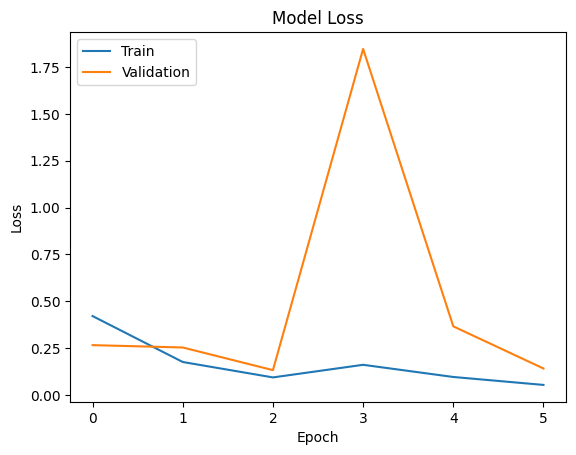

In [ ]:
# Plotting accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the RNN model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {test_accuracy}")


200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9716 - loss: 0.1158
Test accuracy: 0.971397340297699


In [ ]:
# Predict on the test set
y_test_pred_probs = model.predict(X_test_padded)
y_test_pred = (y_test_pred_probs > 0.5).astype(int).flatten()

200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step


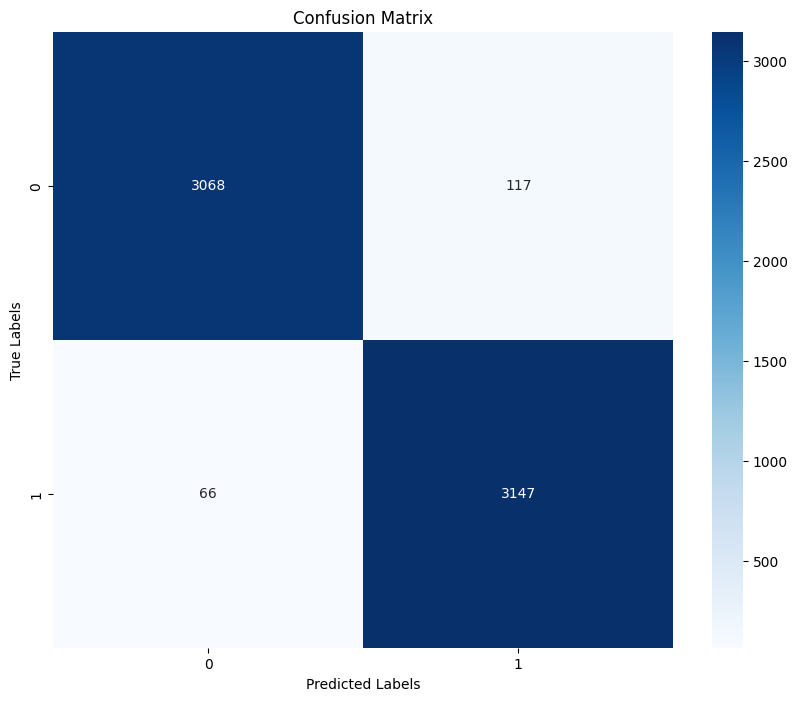

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Extract relevant text features from the unsupervised datasets
X_unlabeled_train = unsupervised_train['postText'].astype(str)
X_unlabeled_val = unsupervised_val['postText'].astype(str)


In [ ]:
# Tokenize and pad the unsupervised data
X_unlabeled_train_seq = tokenizer.texts_to_sequences(X_unlabeled_train)
X_unlabeled_val_seq = tokenizer.texts_to_sequences(X_unlabeled_val)
X_unlabeled_train_padded = pad_sequences(X_unlabeled_train_seq, maxlen=100)
X_unlabeled_val_padded = pad_sequences(X_unlabeled_val_seq, maxlen=100)

In [ ]:
# Predict pseudo-labels for the unsupervised training data
pseudo_labels_train_probs = model.predict(X_unlabeled_train_padded)
pseudo_labels_train = (pseudo_labels_train_probs > 0.5).astype(int).flatten()

100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step


In [ ]:
# Select high-confidence samples for self-training
confidence_threshold = 0.8
high_confidence_idx_train = pseudo_labels_train_probs.flatten() >= confidence_threshold


In [ ]:
# Combine high-confidence pseudo-labeled data with original training data
X_combined_train = np.concatenate([X_train_padded, X_unlabeled_train_padded[high_confidence_idx_train]])
y_combined_train = np.concatenate([y_train, pseudo_labels_train[high_confidence_idx_train]])

In [ ]:
# Retrain the model on the combined dataset
history_retraining = model.fit(X_combined_train, y_combined_train, epochs=10, batch_size=32, validation_split=0.1,callbacks=[early_stopping, reduce_lr])

Epoch 1/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 316s 407ms/step - accuracy: 0.9929 - loss: 0.0617 - val_accuracy: 0.9895 - val_loss: 0.0830 - learning_rate: 2.0000e-04
Epoch 2/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 303s 383ms/step - accuracy: 0.9955 - loss: 0.0415 - val_accuracy: 0.9847 - val_loss: 0.0822 - learning_rate: 2.0000e-04
Epoch 3/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 326s 388ms/step - accuracy: 0.9980 - loss: 0.0291 - val_accuracy: 0.9568 - val_loss: 0.1534 - learning_rate: 2.0000e-04
Epoch 4/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 303s 391ms/step - accuracy: 0.9980 - loss: 0.0226 - val_accuracy: 0.9339 - val_loss: 0.2118 - learning_rate: 2.0000e-04
Epoch 5/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 318s 386ms/step - accuracy: 0.9980 - loss: 0.0201 - val_accuracy: 0.9793 - val_loss: 0.0980 - learning_rate: 1.0000e-04


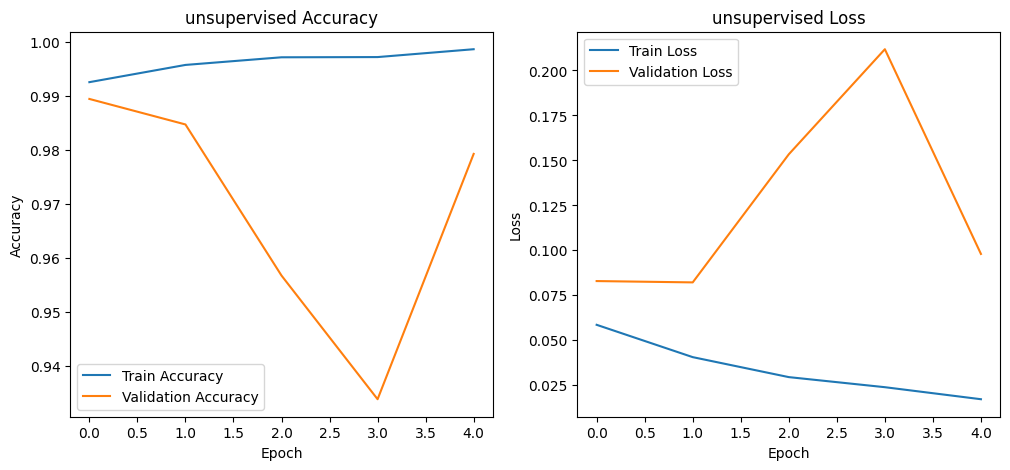

In [ ]:
# Plot accuracy and loss for retraining
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_retraining.history['accuracy'], label='Train Accuracy')
plt.plot(history_retraining.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('unsupervised Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_retraining.history['loss'], label='Train Loss')
plt.plot(history_retraining.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('unsupervised Loss')
plt.legend()

plt.show()



In [ ]:
model.save('globle context function4.h5')

# **Retraining**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

srilanka_data = pd.read_csv('/content/drive/MyDrive/Truth seek/clickbait_data_reduced2.csv')
srilanka_data.head()

,headline,label
0,Never Seen Before youth entrepreneurship,1
1,10 Things About Ayurvedic medicine practices,1
2,Are You Doing This? historical landmarks,1
3,Are You Doing This? climate change effects in ...,1
4,What Happens Next the cinnamon trade,1


In [ ]:
srilanka_data = pd.read_csv('/content/drive/MyDrive/Truth seek/clickbait_data_reduced2.csv')


In [ ]:
pre_trained_model  = load_model('globle context function4.h5')


In [ ]:
# Prepare the data
X_srilanka = srilanka_data['headline']
y_srilanka = srilanka_data['label']

In [ ]:
# Tokenize and pad the text data using the same tokenizer
X_srilanka_seq = tokenizer.texts_to_sequences(X_srilanka)
X_srilanka_padded = pad_sequences(X_srilanka_seq, maxlen=max_sequence_length)

In [ ]:
# Split the Sri Lankan dataset into training and testing sets
X_train_sri, X_test_sri, y_train_sri, y_test_sri = train_test_split(X_srilanka_padded, y_srilanka, test_size=0.2, random_state=42)


In [ ]:
# Compile the model again if needed
pre_trained_model.compile(optimizer=Adam(learning_rate=0.0005),  # reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Early stopping with lower patience
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Train the model on the new Sri Lankan dataset
history_sri = pre_trained_model.fit(X_train_sri, y_train_sri, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping, reduce_lr])


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 820ms/step - accuracy: 0.5630 - loss: 2.5649 - val_accuracy: 0.6250 - val_loss: 1.5928 - learning_rate: 5.0000e-04
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 510ms/step - accuracy: 0.6446 - loss: 1.3777 - val_accuracy: 0.6250 - val_loss: 1.3047 - learning_rate: 5.0000e-04
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 627ms/step - accuracy: 0.6564 - loss: 0.7520 - val_accuracy: 0.6458 - val_loss: 0.8784 - learning_rate: 5.0000e-04
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 647ms/step - accuracy: 0.6659 - loss: 0.6637 - val_accuracy: 0.6042 - val_loss: 0.7758 - learning_rate: 5.0000e-04
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 513ms/step - accuracy: 0.6973 - loss: 0.5794 - val_accuracy: 0.6042 - val_loss: 0.9588 - learning_rate: 5.0000e-04
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 658ms/step - accuracy: 0.7408 - loss: 0.5623 - val_accuracy: 0.6042 - val_loss: 0.8811 - learning_rate: 5.0000e-04
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 658ms/step - accuracy: 0.8422 - loss

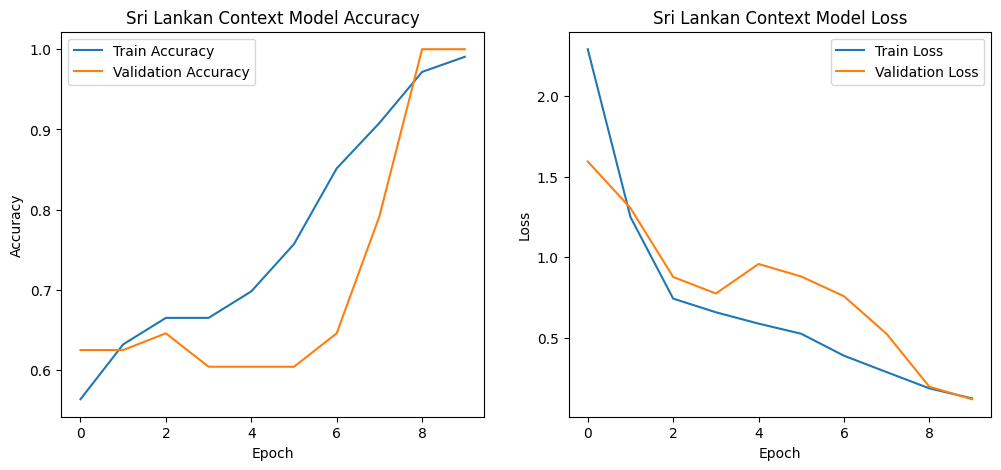

In [ ]:
# Plot accuracy and loss for the retraining
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sri.history['accuracy'], label='Train Accuracy')
plt.plot(history_sri.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Sri Lankan Context Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_sri.history['loss'], label='Train Loss')
plt.plot(history_sri.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Sri Lankan Context Model Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the retrained model on the test set
test_loss_sri, test_accuracy_sri = pre_trained_model.evaluate(X_test_sri, y_test_sri)
print(f"Sri Lankan context test accuracy: {test_accuracy_sri}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9859 - loss: 0.1188
Sri Lankan context test accuracy: 0.9830508232116699


In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# Save the retrained model
pre_trained_model.save('srilanka_context_model.h5')

test the model

In [ ]:
# Manually given input
manual_texts = [
    'Assuming your manually given input is a list of text samples, you’ll need to preprocess it using the same tokenizer and padding as you did with your training data'
]

# Tokenize and pad the text
manual_texts_seq = tokenizer.texts_to_sequences(manual_texts)
manual_texts_padded = pad_sequences(manual_texts_seq, maxlen=max_sequence_length)


In [ ]:
# Load the trained model
model = load_model('/content/srilanka_context_model.h5')

# Make predictions
predictions = model.predict(manual_texts_padded)

# Convert probabilities to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


In [ ]:
# Example mapping (adjust based on your actual label encoding)
label_mapping = {0: 'Not Clickbait', 1: 'Clickbait'}

# Print the results
for text, label in zip(manual_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Label: {label_mapping[label]}\n")


Text: Assuming your manually given input is a list of text samples, you’ll need to preprocess it using the same tokenizer and padding as you did with your training data
Predicted Label: Not Clickbait

